In [1]:
import os
import numpy as np
import pandas as pd
import cv2
#import opendatasets as od

from PIL import Image
import matplotlib.pyplot as plt
from skimage.io import imread, imshow,show
from skimage.transform import resize

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, backend
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
images_path =  '../data/'
import json

# 파일 열기
with open(os.path.join(images_path,"COCO_motorcycle (pixel).json"), "r") as f:
    # 파일 내용 읽기
    data = json.load(f)

for item in data:
    print(item)

info
licenses
images
annotations
categories


In [4]:
# 파일 내용 출력
print(data["info"])

{'description': 'This is dataset.', 'url': 'https://superannotate.ai', 'version': '1.0', 'year': 2022, 'contributor': 'Superannotate AI', 'date_created': '15/09/2022'}


In [5]:
print(data["images"][0])

{'id': 1, 'file_name': 'night ride (8).png', 'height': 1080, 'width': 1920, 'license': 1}


In [6]:
print(data["categories"])

[{'id': 1329681, 'name': 'Rider', 'supercategory': 'Rider', 'isthing': 1, 'color': [17, 74, 20]}, {'id': 1323885, 'name': 'My bike', 'supercategory': 'My bike', 'isthing': 1, 'color': [109, 51, 20]}, {'id': 1323884, 'name': 'Moveable', 'supercategory': 'Moveable', 'isthing': 1, 'color': [108, 51, 20]}, {'id': 1323882, 'name': 'Lane Mark', 'supercategory': 'Lane Mark', 'isthing': 1, 'color': [106, 51, 20]}, {'id': 1323881, 'name': 'Road', 'supercategory': 'Road', 'isthing': 1, 'color': [105, 51, 20]}, {'id': 1323880, 'name': 'Undrivable', 'supercategory': 'Undrivable', 'isthing': 1, 'color': [104, 51, 20]}]


In [7]:
print(data["annotations"][0])

{'id': 1, 'image_id': 1, 'segmentation': [[0, 0, 0, 1, 0, 2, 0, 3, 0, 4, 0, 5, 0, 6, 0, 7, 0, 8, 0, 9, 0, 10, 0, 11, 0, 12, 0, 13, 0, 14, 0, 15, 0, 16, 0, 17, 0, 18, 0, 19, 0, 20, 0, 21, 0, 22, 0, 23, 0, 24, 0, 25, 0, 26, 0, 27, 0, 28, 0, 29, 0, 30, 0, 31, 0, 32, 0, 33, 0, 34, 0, 35, 0, 36, 0, 37, 0, 38, 0, 39, 0, 40, 0, 41, 0, 42, 0, 43, 0, 44, 0, 45, 0, 46, 0, 47, 0, 48, 0, 49, 0, 50, 0, 51, 0, 52, 0, 53, 0, 54, 0, 55, 0, 56, 0, 57, 0, 58, 0, 59, 0, 60, 0, 61, 0, 62, 0, 63, 0, 64, 0, 65, 0, 66, 0, 67, 0, 68, 0, 69, 0, 70, 0, 71, 0, 72, 0, 73, 0, 74, 0, 75, 0, 76, 0, 77, 0, 78, 0, 79, 0, 80, 0, 81, 0, 82, 0, 83, 0, 84, 0, 85, 0, 86, 0, 87, 0, 88, 0, 89, 0, 90, 0, 91, 0, 92, 0, 93, 0, 94, 0, 95, 0, 96, 0, 97, 0, 98, 0, 99, 0, 100, 0, 101, 0, 102, 0, 103, 0, 104, 0, 105, 0, 106, 0, 107, 0, 108, 0, 109, 0, 110, 0, 111, 0, 112, 0, 113, 0, 114, 0, 115, 0, 116, 0, 117, 0, 118, 0, 119, 0, 120, 0, 121, 0, 122, 0, 123, 0, 124, 0, 125, 0, 126, 0, 127, 0, 128, 0, 129, 0, 130, 0, 131, 0, 132, 0, 

In [8]:
for i in range(6):
    print(data["categories"][i]['name'],data["categories"][i]['color'])

Rider [17, 74, 20]
My bike [109, 51, 20]
Moveable [108, 51, 20]
Lane Mark [106, 51, 20]
Road [105, 51, 20]
Undrivable [104, 51, 20]


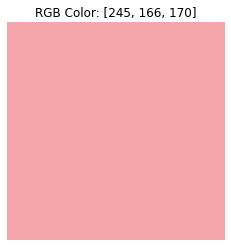

In [9]:
rgb_color = [245, 166, 170]
rgb_image = np.array(rgb_color).reshape(1, 1, 3) / 255.0

plt.imshow(rgb_image)
plt.title(f"RGB Color: {rgb_color}")
plt.axis('off')
plt.show()

In [10]:
# 클래스별 객체 수 출력

class_counts = {}
for annotation in data["annotations"]:
    class_id = annotation["category_id"]
    if class_id not in class_counts:
        class_counts[class_id] = 0
    class_counts[class_id] += 1

for class_id1, count in class_counts.items():
    for class_id2, category in enumerate(data['categories']):
        if category['id'] == class_id1:
            print(f"{category['name']}: {count}")

Undrivable: 200
Road: 200
Lane Mark: 207
Moveable: 1298
My bike: 200
Rider: 200


In [11]:
a1 = {}
for i in range(len(data["annotations"])):
    img_id = data["annotations"][i]['image_id']
    img_cat = data["annotations"][i]['category_id']
    
    if img_id not in a1:
        a1[img_id] = {img_cat: 1}
    else:
        if img_cat not in a1[img_id]:
            a1[img_id][img_cat] = 1
        else:
            a1[img_id][img_cat] += 1

In [12]:
for key, value in a1.items():
    print(key, value)

1 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 6, 1323885: 1, 1329681: 1}
2 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 7, 1323885: 1, 1329681: 1}
3 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 5, 1323885: 1, 1329681: 1}
4 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 7, 1323885: 1, 1329681: 1}
5 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 9, 1323885: 1, 1329681: 1}
6 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 7, 1323885: 1, 1329681: 1}
7 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 8, 1323885: 1, 1329681: 1}
8 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 7, 1323885: 1, 1329681: 1}
9 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 9, 1323885: 1, 1329681: 1}
10 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 6, 1323885: 1, 1329681: 1}
11 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 7, 1323885: 1, 1329681: 1}
12 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 10, 1323885: 1, 1329681: 1}
13 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 2, 1323885: 1, 1329681: 1}
14 {1323880: 1, 1323

In [13]:
# 딕셔너리 변환 작업
new_a1 = {}
for outer_key, inner_dict in a1.items():
    new_inner_dict = {}
    for num_key, value in inner_dict.items():
        for category in data["categories"]:
            if category['id'] == num_key:
                new_inner_dict[category['name']] = value
    new_a1[outer_key] = new_inner_dict

In [14]:
for key, value in new_a1.items():
    print(key, value)

1 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 6, 'My bike': 1, 'Rider': 1}
2 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 7, 'My bike': 1, 'Rider': 1}
3 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 5, 'My bike': 1, 'Rider': 1}
4 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 7, 'My bike': 1, 'Rider': 1}
5 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 9, 'My bike': 1, 'Rider': 1}
6 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 7, 'My bike': 1, 'Rider': 1}
7 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 8, 'My bike': 1, 'Rider': 1}
8 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 7, 'My bike': 1, 'Rider': 1}
9 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 9, 'My bike': 1, 'Rider': 1}
10 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 6, 'My bike': 1, 'Rider': 1}
11 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 7, 'My bike': 1, 'Rider': 1}
12 {'Undrivable': 1, 'Road': 1

(1080, 1920, 3)


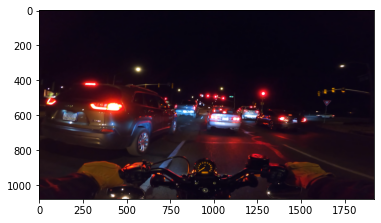

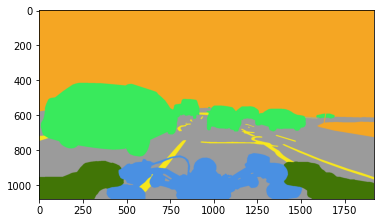

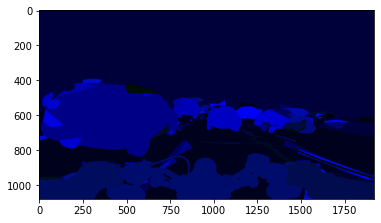

In [15]:
images_path =  '../data/images'
img_name='/night ride (33).png'
img1 = images_path + img_name
img2 = images_path + img_name + '___fuse.png'
img3 = images_path + img_name + '___save.png'
test1 = cv2.imread(img1) 
test2 = cv2.imread(img2) 
test3 = cv2.imread(img3) 
print(test1.shape)

plt.imshow(cv2.cvtColor(test1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(test2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(test3, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
image = list()
fuse = list()
blue = list()

for images in os.listdir(images_path):
    if images.find('___', 0) == -1:
        image.append(os.path.join(images_path, images))
        fuse.append(os.path.join(images_path, images + '___fuse.png'))
        blue.append(os.path.join(images_path, images + '___save.png'))

In [17]:
#리스트에 저장된 파일이 올바르게 정렬되어 있는지 확인
print(image[8])
print(fuse[8])
print(blue[8])

../data/images/Screenshot (429).png.png
../data/images/Screenshot (429).png.png___fuse.png
../data/images/Screenshot (429).png.png___save.png


In [18]:
img = Image.open(blue[1])
print(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1920x1080 at 0x7FE24F204F70>


In [19]:
image1=[]
mask1=[]
blue1=[]
def pre(img_type, img_list):
    for img_path in img_type:
        # PIL 라이브러리를 사용하여 이미지 열기
        img = Image.open(img_path)
        # PIL 이미지를 NumPy 배열로 변환
        img_array = np.array(img)
        if img_array.shape[-1] == 4:  # RGBA 이미지인지 확인
            # 알파 채널 분리
            alpha_channel = img_array[:, :, 3]
            # RGB 채널에 알파 채널 적용
            img_array[:, :, :3] = img_array[:, :, :3] * (alpha_channel / 255.0)[:, :, np.newaxis]
            # 알파 채널 제거
            img_array = img_array[:, :, :3]
        # 이미지 배열을 리스트에 추가
        img_list.append(img_array)

In [20]:
pre(image,image1)

In [21]:
pre(fuse, mask1)

In [22]:
pre(blue, blue1)

In [23]:
image1 = np.array(image1)
mask1 = np.array(mask1)
blue1 = np.array(blue1)

In [25]:
from keras.preprocessing.image import load_img

uniques = np.empty((0,3))
#for  i in  range(309, 451):
for  i in  range(309, 312):    
    print(f'Extracting unique classes from')
    label = ""
    label= load_img(f"{images_path}/Screenshot ({i}).png___fuse.png")
    label_arr = np.array(label)
    label_reshaped = tf.reshape(label_arr, [-1, 3]).numpy()
    uniques = np.append(uniques, np.unique(label_reshaped, axis=0), axis=0)
np.unique(uniques, axis=0).shape

uniques = np.unique(uniques, axis=0)
categories = uniques.tolist()

Extracting unique classes from
Extracting unique classes from
Extracting unique classes from


In [26]:
categories

[[0.0, 0.0, 0.0],
 [57.0, 234.0, 92.0],
 [65.0, 117.0, 6.0],
 [74.0, 144.0, 226.0],
 [155.0, 155.0, 155.0],
 [245.0, 166.0, 35.0],
 [248.0, 231.0, 28.0]]

In [27]:
categories.remove([0.0, 0.0, 0.0])

In [28]:
import numpy as np
from skimage.transform import resize

# 이미지 데이터 배열
image_data = mask1  # (200, 1080, 1920, 3) 크기의 이미지 데이터 배열을 넣어주세요

# 라벨 컬러-클래스 매핑
color_to_class = {
    (65, 117, 6): 0,
    (74, 144, 226): 1,
    (57, 234, 92): 2,
    (248, 231, 28): 3,
    (155, 155, 155): 4,
    (245, 166, 35): 5,
    # 필요한 만큼 더 컬러-클래스 매핑 추가
}
new_height = 224
new_width = 224

#이미지 리사이즈
resized_image_data = np.zeros((image_data.shape[0], new_height, new_width, 3), dtype=int)
for i in range(image_data.shape[0]):
    resized_image_data[i] = resize(image_data[i], 
                                   (new_height, new_width), mode='constant', preserve_range=True)

# 컬러별 클래스 인덱스 배열 생성
color_class_= np.zeros((image_data.shape[0], new_height, new_width), dtype=int)

for color, class_ in color_to_class.items():
    mask = np.all(resized_image_data == np.array(color), axis=-1)
    color_class_[mask] = class_

# 라벨에 대한 원핫 인코딩 수행
num_classes = len(color_to_class)
one_hot_labels = np.eye(num_classes)[color_class_]

In [29]:
#추가 전처리
image1
blue1
resized_image1_data = np.zeros((image1.shape[0], new_height, new_width, 3), dtype=float)
resized_blue1_data = np.zeros((blue1.shape[0], new_height, new_width, 3), dtype=float)
for i in range(image1.shape[0]):
    resized_image1_data[i] = resize(image1[i], (new_height, new_width), mode='constant', preserve_range=True)

In [30]:
for i in range(blue1.shape[0]):
    resized_blue1_data[i] = resize(blue1[i], (new_height, new_width), mode='constant', preserve_range=True)

In [31]:
resized_image1_data[1]

array([[[ 2.        ,  1.        ,  7.91071429],
        [ 2.        ,  1.        ,  8.91071429],
        [ 3.        ,  2.        ,  8.91071429],
        ...,
        [ 1.        ,  2.        ,  9.91071429],
        [ 1.        ,  2.        ,  9.91071429],
        [ 0.        ,  1.        ,  7.91071429]],

       [[ 2.        ,  1.        ,  9.        ],
        [ 2.        ,  1.        , 10.        ],
        [ 3.        ,  2.        , 10.        ],
        ...,
        [ 1.        ,  3.        , 11.        ],
        [ 1.        ,  2.        , 11.        ],
        [ 0.        ,  1.        ,  9.        ]],

       [[ 3.        ,  2.        ,  9.78571429],
        [ 3.        ,  2.        , 10.        ],
        [ 4.        ,  3.        , 10.        ],
        ...,
        [ 2.        ,  3.        , 11.        ],
        [ 2.        ,  3.        , 11.        ],
        [ 1.        ,  2.        ,  9.        ]],

       ...,

       [[54.06505102, 45.51147959, 23.79209184],
        [80

In [32]:
resized_image1_data.shape

(200, 224, 224, 3)

In [33]:
one_hot_labels.shape

(200, 224, 224, 6)

In [34]:
print(one_hot_labels[45])

[[[1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  ...
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  ...
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1.]
  ...
  [0. 0. 0. 0. 0. 1.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]]

 ...

 [[1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0.]
  ...
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  ...
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  ...
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]]]


In [35]:
#데이터를 훈련 세트와 검증 세트, 평가 세트로 나눈다.
images = resized_image1_data
images = tf.keras.applications.resnet50.preprocess_input(images)

#원본이미지
train_images_original= images[:140]
val_images_original = images[140:170]
test_images_original = images[170:200]

#fuse이미지
images = one_hot_labels
train_images_mask= images[:140]
val_images_mask= images[140:170]
test_images_mask = images[170:200]

#블루마스크 이미지
images = resized_blue1_data
train_images_blue= images[:140]
val_images_blue= images[140:170]
test_images_blue = images[170:200]

In [36]:
train_images_mask.shape

(140, 224, 224, 6)

In [37]:
train_images_original.shape

(140, 224, 224, 3)

In [38]:
train_images_mask.shape

(140, 224, 224, 6)

In [39]:
train_images_mask[1]

array([[[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        ...,
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        ...,
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]],

       ...,

       [[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        .

In [40]:
val_images_mask.shape

(30, 224, 224, 6)

In [41]:
#augmentation
import random

def augment(image,label,bluemask):
    
    value_list = [0, 1] #랜덤하게 augmentation을 하기위해 필요한 리스트
    seed = tf.random.uniform((), minval=0, maxval=1, dtype=tf.float32)
    seed_v = seed.numpy() #0~1사이의 값
    seed2 = tf.random.uniform((), minval=0, maxval=0.3, dtype=tf.float32)
    seed_v2 = seed2.numpy()#0~0.5 사이의 값
    a = random.choice(value_list)
    b = random.choice(value_list)
    #좌우뒤집기
    if a == 1:
        image = tf.image.flip_left_right(image)
        label = tf.image.flip_left_right(label)
        bluemask = tf.image.flip_left_right(bluemask)
    
    # 상하뒤집기
    if b == 1:
        image = tf.image.flip_up_down(image)
        label = tf.image.flip_up_down(label)
        bluemask = tf.image.flip_up_down(bluemask)
        
    #밝기 조절
    if random.choice(value_list) == 1:
        image = tf.image.adjust_brightness(image, delta=seed_v2)
        image = tf.clip_by_value(image, 0, 1)
        
    if a == 0 and b == 0:
        return
    return image, label, bluemask

In [42]:
# augmentation 적용
augmented_images = []
augmented_mask = []
augmented_blue = []
for i in range(len(train_images_original)):
    augmented_result = augment(train_images_original[i], train_images_mask[i], train_images_blue[i])
    if augmented_result is None:
        continue
    augmented_image_, augmented_mask_, augmented_blue_ = augmented_result
    augmented_images.append(augmented_image_)
    augmented_mask.append(augmented_mask_)
    augmented_blue.append(augmented_blue_)

In [43]:
train_images_original = np.concatenate((train_images_original, augmented_images), axis=0)
train_images_mask = np.concatenate((train_images_mask, augmented_mask), axis=0)
train_images_blue = np.concatenate((train_images_blue, augmented_blue), axis=0)

In [44]:
train_images_original = np.array(train_images_original)

In [45]:
train_images_mask = np.array(train_images_mask)

In [46]:
train_images_blue = np.array(train_images_blue)

In [47]:
train_images_original.shape

(249, 224, 224, 3)

In [48]:
def convolution_block(
    block_input,
    num_filters=256,
    kernel_size=3,
    dilation_rate=1,
    padding="same",
    use_bias=False,
):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
    )(block_input)
    x = layers.BatchNormalization()(x)
    return tf.nn.relu(x)


def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]), interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output

In [50]:
def DeeplabV3Plus(image_size, num_classes):
    model_input = keras.Input(shape=(image_size, image_size, 3))
    resnet50 = keras.applications.ResNet50(
        weights="imagenet", include_top=False, input_tensor=model_input
    )
    x = resnet50.get_layer("conv4_block6_2_relu").output
    x = DilatedSpatialPyramidPooling(x)

    input_a = layers.UpSampling2D(
        size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
        interpolation="bilinear",
    )(x)
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    x = layers.UpSampling2D(
        size=(image_size // x.shape[1], image_size // x.shape[2]),
        interpolation="bilinear",
    )(x)
    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
    return keras.Model(inputs=model_input, outputs=model_output)


model = DeeplabV3Plus(image_size=224, num_classes=6)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [54]:
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=loss,
    metrics=["accuracy"],
)

In [55]:
history = model.fit(
    x=train_images_original,
    y=train_images_mask,
    validation_data=(val_images_original, val_images_mask),
    epochs=60,
)

Epoch 1/60
8/8 [==============================] - 28s 2s/step - loss: 1.2205 - accuracy: 0.5824 - val_loss: 74.6753 - val_accuracy: 0.3569
Epoch 2/60
8/8 [==============================] - 5s 617ms/step - loss: 0.5880 - accuracy: 0.7738 - val_loss: 57.0708 - val_accuracy: 0.3232
Epoch 3/60
8/8 [==============================] - 5s 618ms/step - loss: 0.5016 - accuracy: 0.8005 - val_loss: 14.7107 - val_accuracy: 0.2779
Epoch 4/60
8/8 [==============================] - 5s 622ms/step - loss: 0.4509 - accuracy: 0.8186 - val_loss: 9.9063 - val_accuracy: 0.3429
Epoch 5/60
8/8 [==============================] - 5s 625ms/step - loss: 0.4213 - accuracy: 0.8287 - val_loss: 3.0650 - val_accuracy: 0.4006
Epoch 6/60
8/8 [==============================] - 5s 628ms/step - loss: 0.3963 - accuracy: 0.8382 - val_loss: 2.6164 - val_accuracy: 0.4269
Epoch 7/60
8/8 [==============================] - 5s 628ms/step - loss: 0.3821 - accuracy: 0.8412 - val_loss: 2.0700 - val_accuracy: 0.4832
Epoch 8/60
8/8 [===

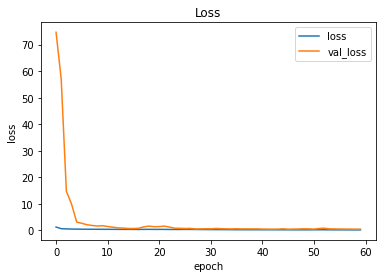

In [56]:
plt.title("loss 그래프")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

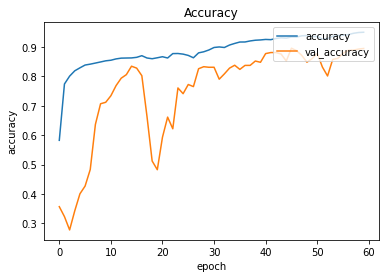

In [57]:
plt.title("accuracy 그래프")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')
plt.show()

In [58]:
import matplotlib.pyplot as plt

def decode_and_visualize(images, masks, model, index):
    # 모델을 사용하여 마스크 예측
    predicted_masks = model.predict(images)
    # 원본 이미지
    original_image = images[index]
    # 실제 마스크
    true_mask = masks[index]
    
    # 예측된 마스크
    predicted_mask = predicted_masks[index]
    true_mask_ = np.where(true_mask >= 0.5, 1, 0)
    predicted_mask_ = np.where(predicted_mask >= 0.5, 1, 0)
    

    # 원본 이미지 출력
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(original_image.astype(np.uint8))
    plt.title('original')
    
    # 실제 마스크 출력
    plt.subplot(1, 3, 2)
    plt.imshow(true_mask_.argmax(axis=-1))
    plt.title('true_mask')
    
    # 예측된 마스크 출력
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_mask_.argmax(axis=-1))
    plt.title('predict')
    #print(thresholded_predicted_mask.argmax(axis=-1))
    plt.show()
    return true_mask_, predicted_mask_
    

In [59]:
def calculate_iou_score2(target, prediction, num_classes):
    iou_scores = []
    class_n = 0
    for class_id in range(num_classes):
        # 현재 클래스에 대한 교차 및 합집합 계산
        intersection = np.logical_and(target[:,:, class_id] == 1, prediction[:,:, class_id] == 1).sum()
        union = np.logical_or(target[:,:, class_id] == 1, prediction[:,:, class_id] == 1).sum()
        # 클래스별 IoU 계산
        class_iou = intersection / union if union != 0 else 0
        iou_scores.append(class_iou)
        is_value_present = target[:,:, class_id] == 1
        num_true_values = np.count_nonzero(is_value_present)
        if num_true_values > 10:
            class_n += 1
    # 평균 IoU 계산
    mean_iou = sum(iou_scores) / class_n
    return mean_iou

In [60]:
test_images_mask[:3].shape

(3, 224, 224, 6)

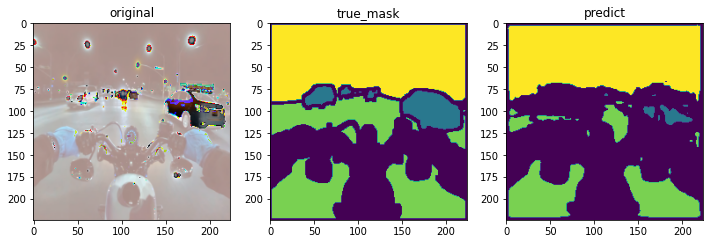

IoU 0:  0.711


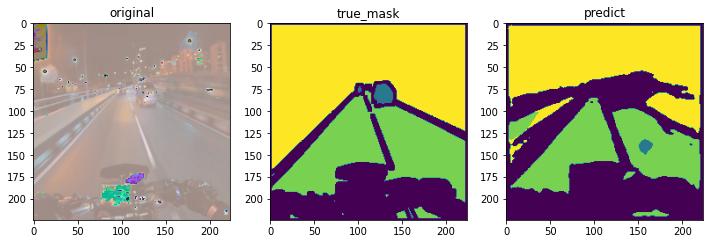

IoU 1:  0.490


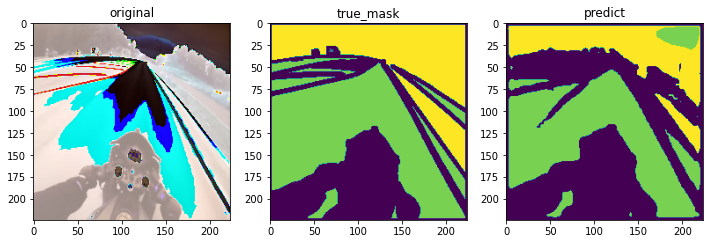

IoU 2:  0.536


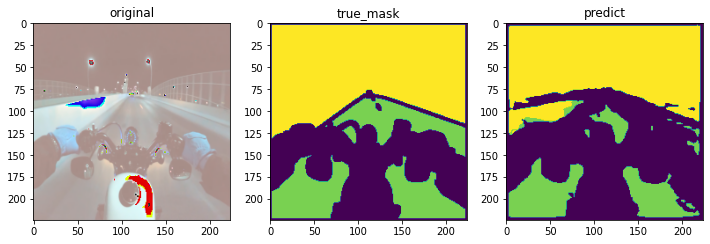

IoU 3:  0.794


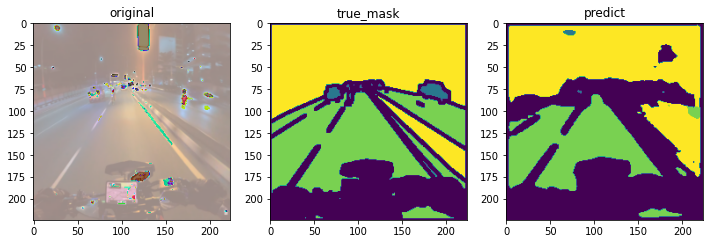

IoU 4:  0.452


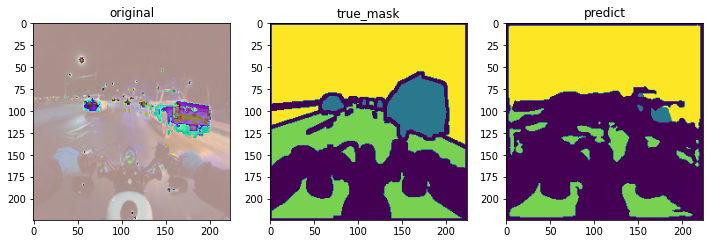

IoU 5:  0.607


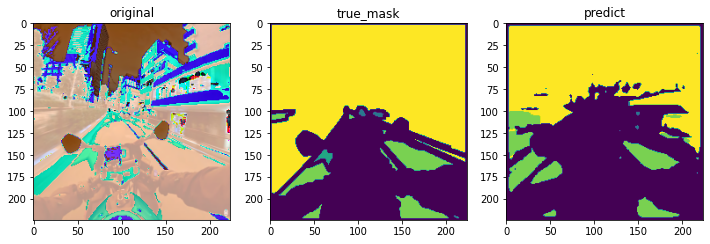

IoU 6:  0.432


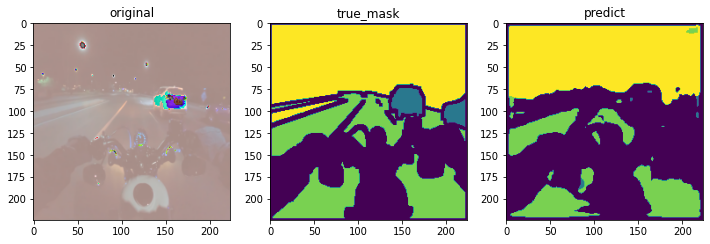

IoU 7:  0.629


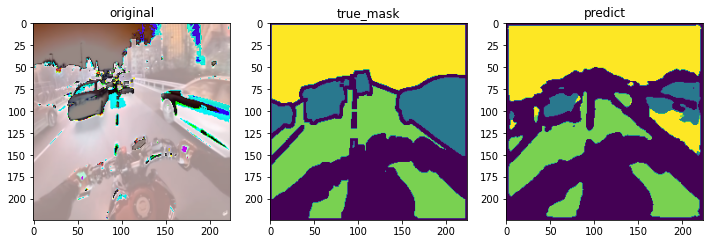

IoU 8:  0.675


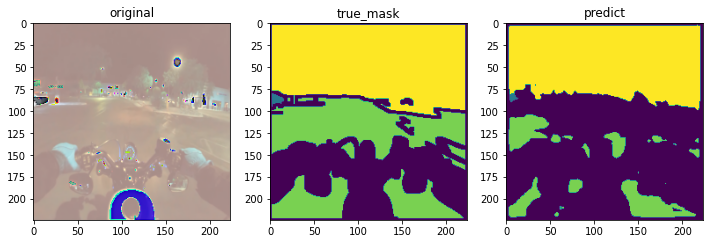

IoU 9:  0.582


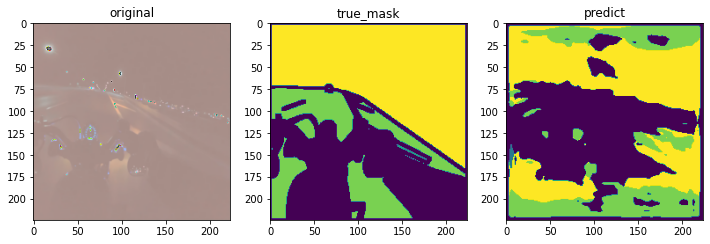

IoU 10:  0.309


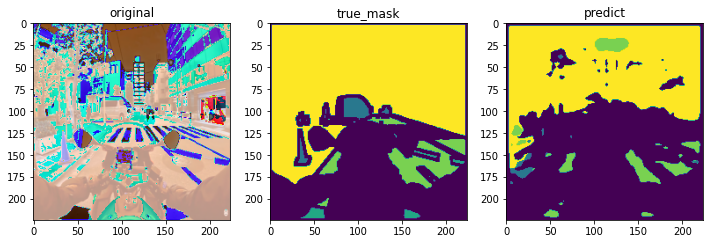

IoU 11:  0.391


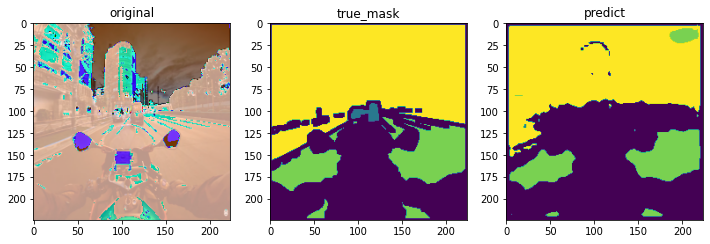

IoU 12:  0.632


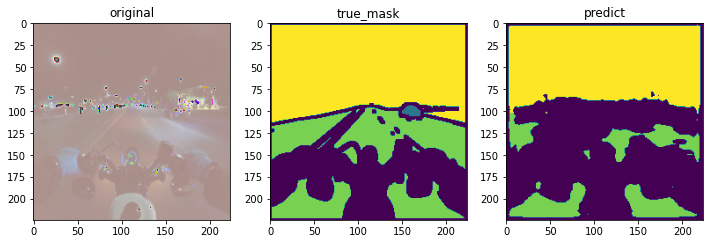

IoU 13:  0.609


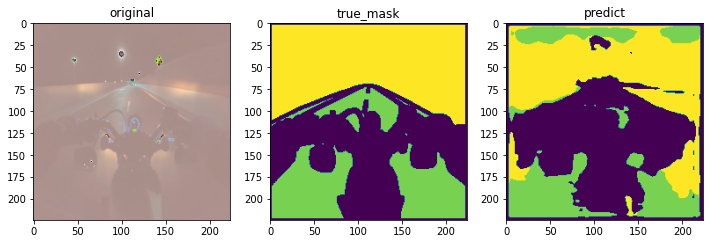

IoU 14:  0.588


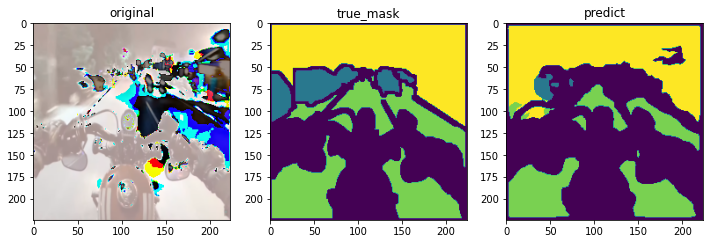

IoU 15:  0.637


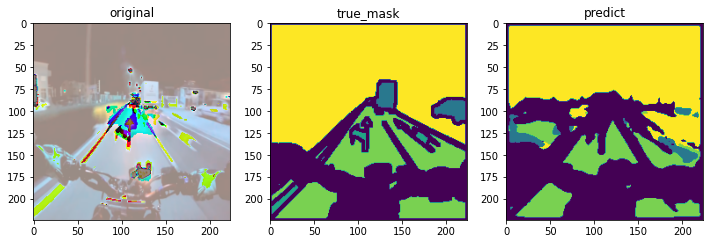

IoU 16:  0.456


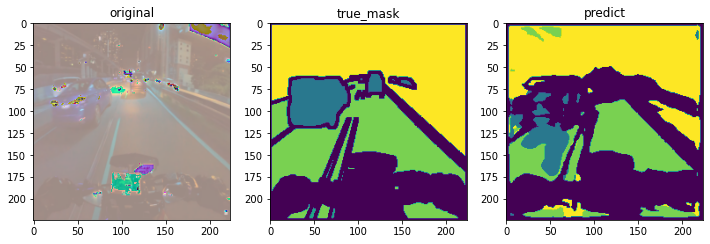

IoU 17:  0.469


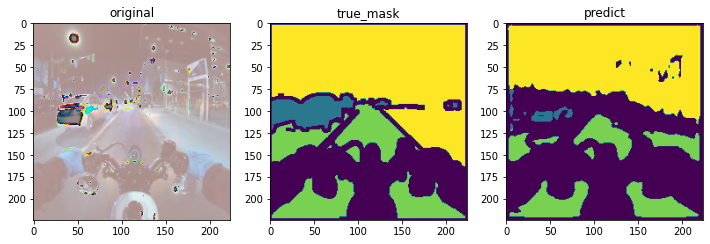

IoU 18:  0.633


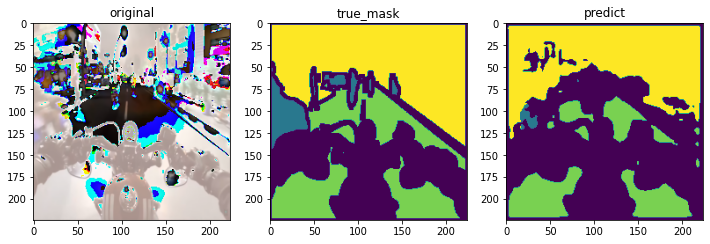

IoU 19:  0.606


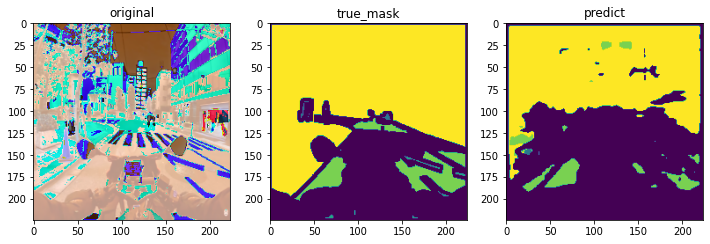

IoU 20:  0.414


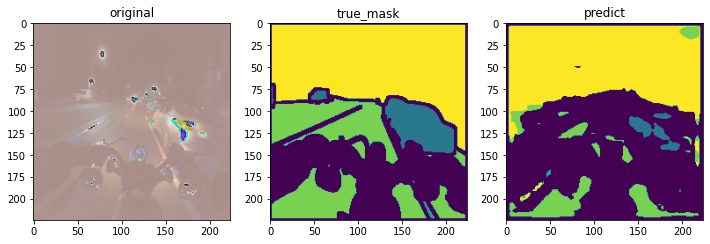

IoU 21:  0.482


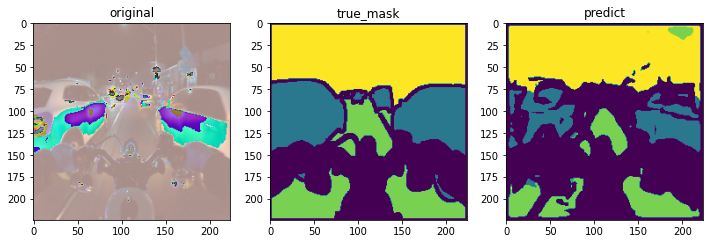

IoU 22:  0.665


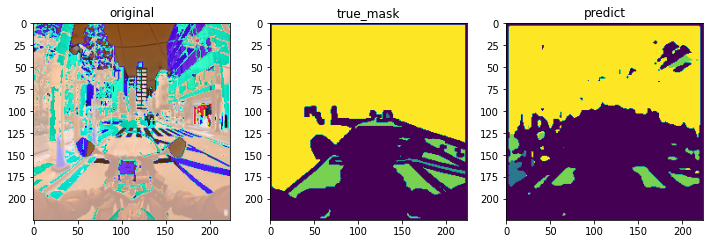

IoU 23:  0.416


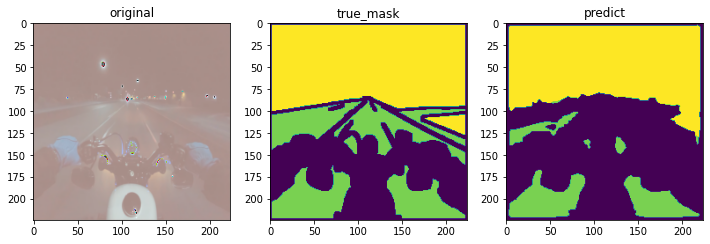

IoU 24:  0.753


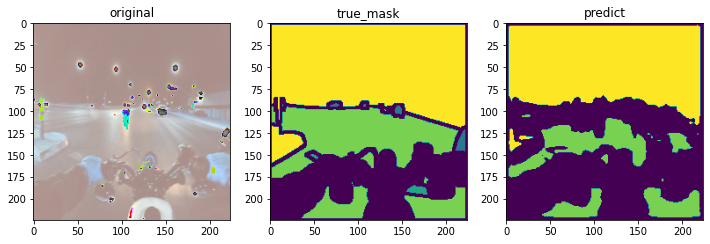

IoU 25:  0.472


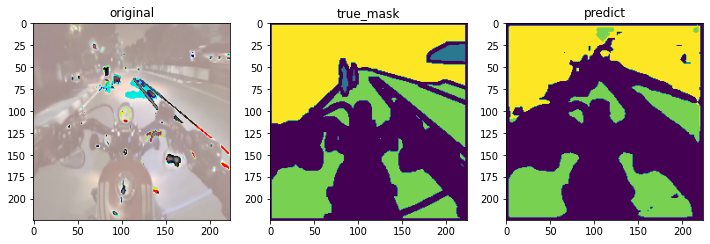

IoU 26:  0.563


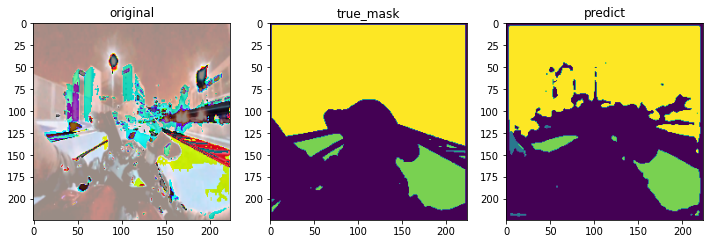

IoU 27:  0.560


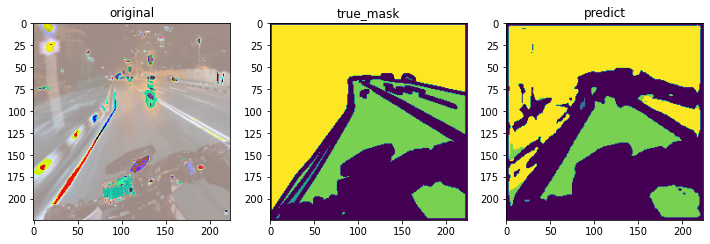

IoU 28:  0.473


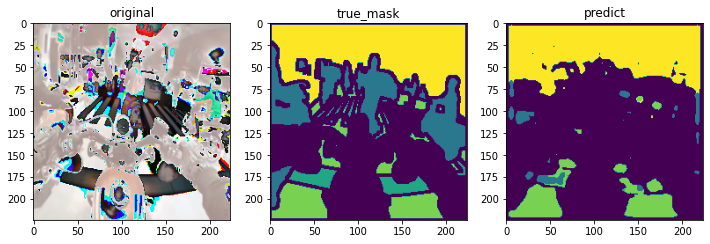

IoU 29:  0.425


In [61]:
iou=[]
for i in range(30):
    # 랜덤한 예제를 시각화하기 위해 함수 호출
    target,prediction = decode_and_visualize(test_images_original, test_images_mask, model,i)
    # 목표 및 예측 마스크로 함수 호출
    mean_iou = calculate_iou_score2(target, prediction, 6)
    iou.append(mean_iou)
    print("IoU {}:  {:.3f}".format(i, mean_iou))

In [62]:
# 리스트 내 모든 숫자의 합 구하기
total_sum = sum(iou)
# 리스트의 개수 구하기
num_elements = len(iou)
# 평균 계산
average = total_sum / num_elements
print(average)

0.5487527668469129
